In [116]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [117]:
train_df = pd.read_csv("Train.csv")

In [118]:
y_train = train_df["price"]

In [119]:
X_train = train_df.drop(["price"], axis = 1)

In [120]:
test_df = pd.read_csv("Test.csv")

In [126]:
numeric_data = X_train.select_dtypes([np.number])

numeric_data_mean = numeric_data.mean()
numeric_features = numeric_data.columns

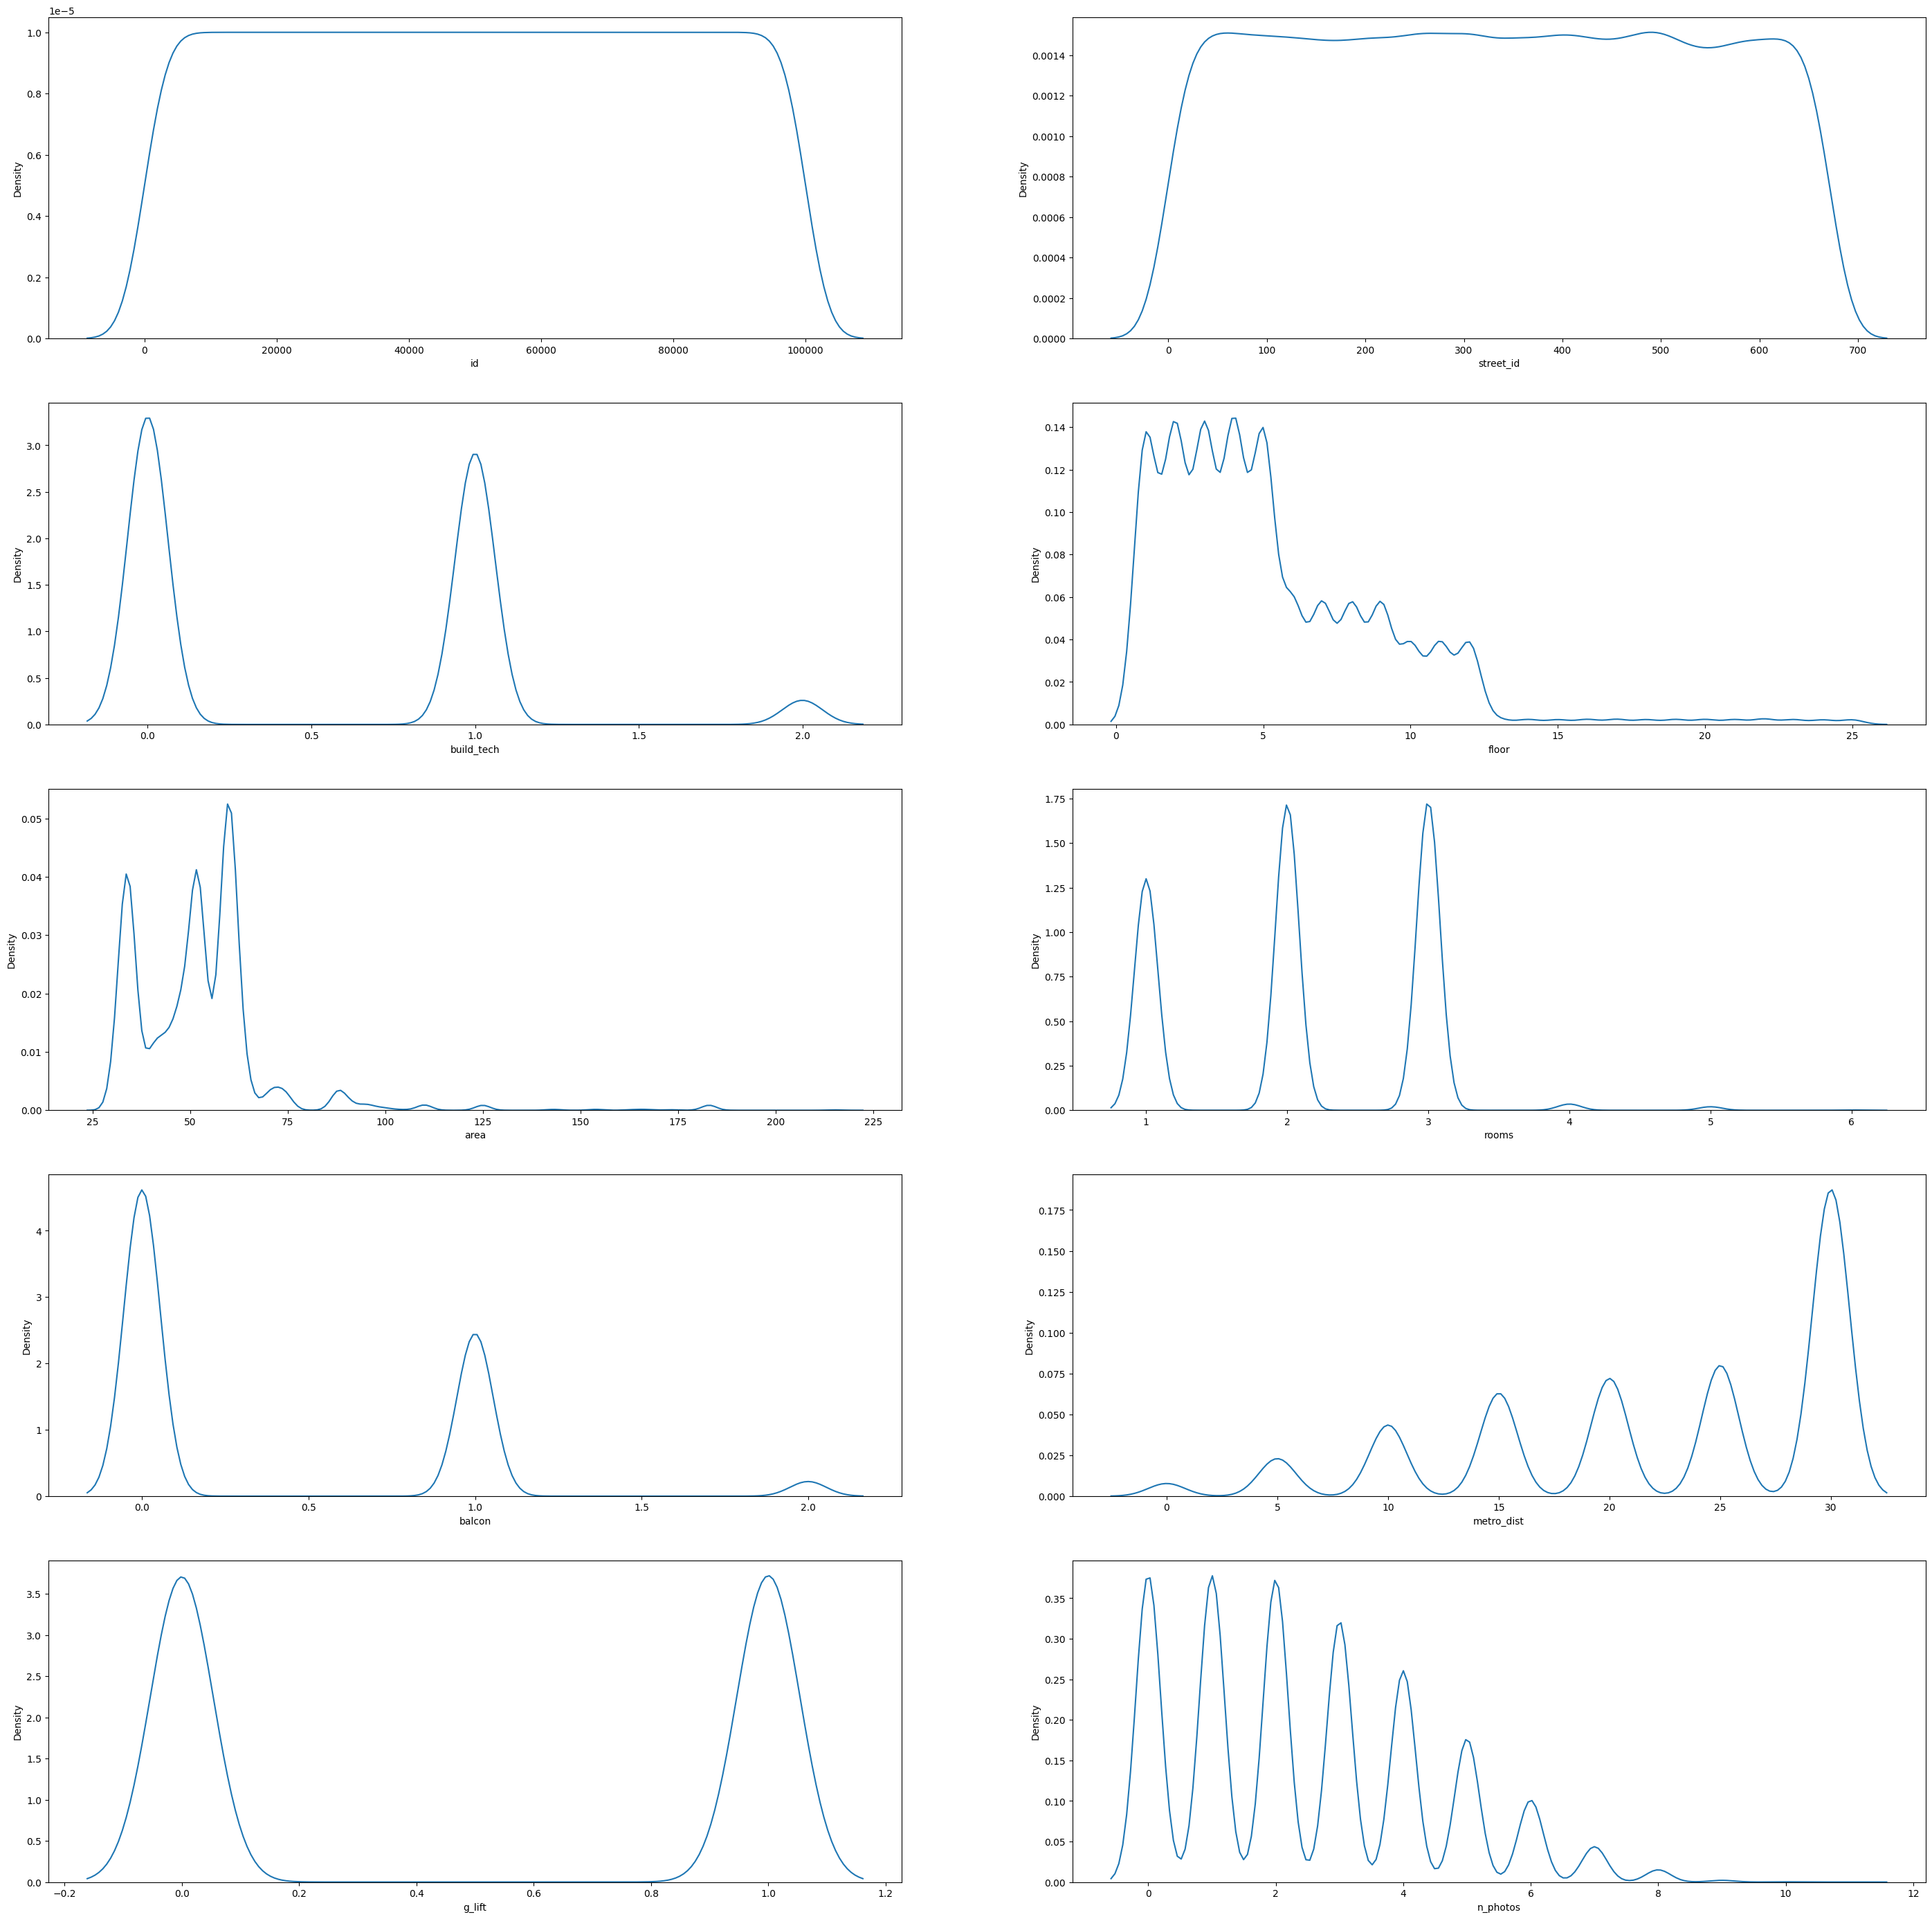

In [127]:
fig, axes = plt.subplots(ncols=2, nrows=5, figsize=(35, 35))

for i in range(5):
    for j in range(2):
        sns.kdeplot(data=train_df[numeric_features[i*2 + j]], ax=axes[i][j])
        if i * 5 + j >= len(numeric_features):
            break

In [128]:
numeric_features = numeric_features.drop('g_lift')

In [129]:
X_train.describe()

,id,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,n_photos,...,kw4,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13
count,100000.000000,100000.000000,70265.000000,100000.000000,100000.00000,100000.000000,100000.000000,95104.000000,70008.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.00000
mean,49999.500000,334.479290,0.529837,5.267680,52.25343,2.118680,0.396740,22.154431,0.500986,2.470910,...,0.006300,0.004360,0.001430,0.000940,0.007910,0.007890,0.00218,0.000320,0.001210,0.00021
std,28867.657797,194.004755,0.573645,3.905558,17.79250,0.829688,0.547632,8.286241,0.500003,1.944981,...,0.079123,0.065887,0.037788,0.030645,0.088586,0.088475,0.04664,0.017886,0.034764,0.01449
min,0.000000,0.000000,0.000000,1.000000,29.00000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000
25%,24999.750000,167.000000,0.000000,2.000000,40.00000,1.000000,0.000000,15.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000
50%,49999.500000,334.000000,0.000000,4.000000,52.00000,2.000000,0.000000,25.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000
75%,74999.250000,501.000000,1.000000,7.000000,60.00000,3.000000,1.000000,30.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000
max,99999.000000,671.000000,2.000000,25.000000,217.00000,6.000000,2.000000,30.000000,1.000000,11.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000


In [130]:
numeric_features

Index(['id', 'street_id', 'build_tech', 'floor', 'area', 'rooms', 'balcon',
       'metro_dist', 'n_photos', 'kw1', 'kw2', 'kw3', 'kw4', 'kw5', 'kw6',
       'kw7', 'kw8', 'kw9', 'kw10', 'kw11', 'kw12', 'kw13'],
      dtype='object')

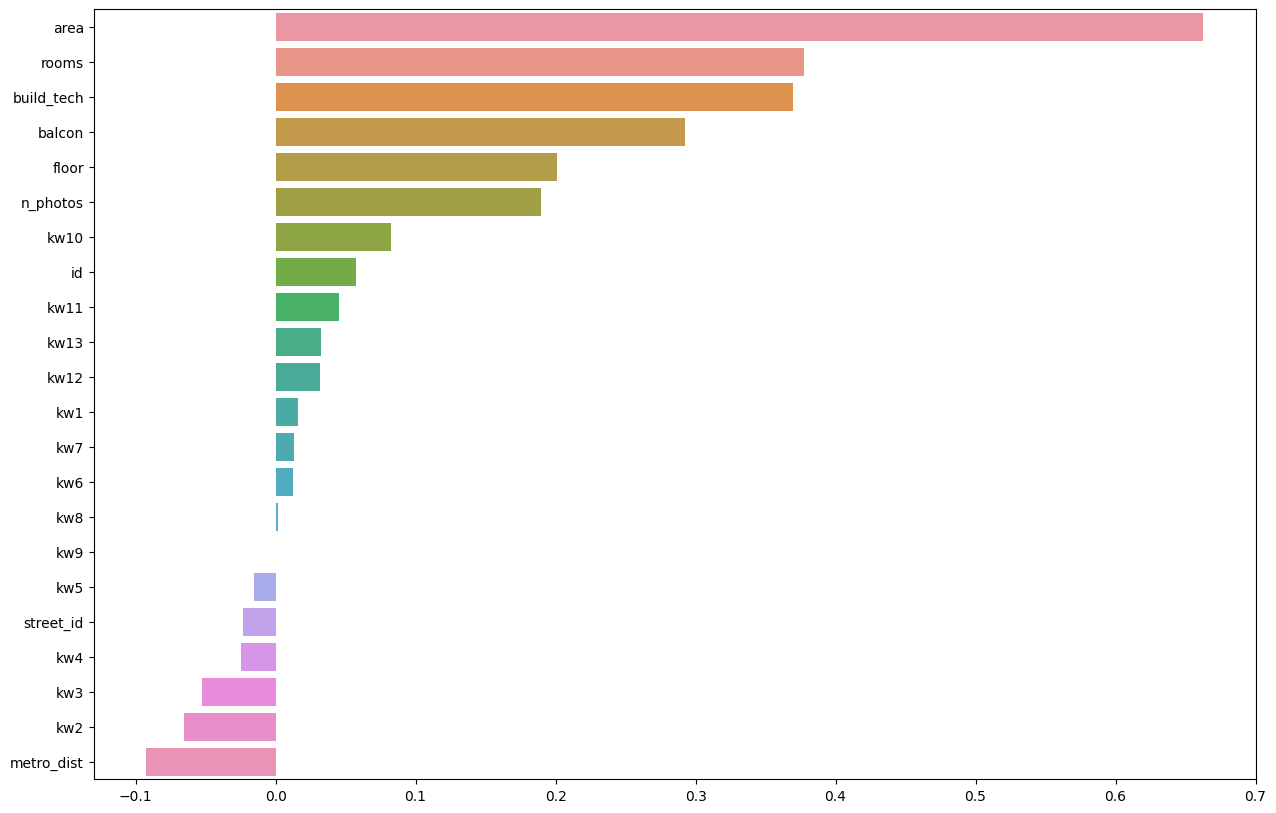

In [131]:
correlations = X_train[numeric_features].corrwith(y_train).sort_values(ascending=False)


plot = sns.barplot(y=correlations.index, x=correlations)
plot.figure.set_size_inches(15, 10)

In [132]:
for feature in numeric_features:
    if 0 <= correlations[feature] <= 0.1:
        numeric_features = numeric_features.drop(feature)

In [133]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [134]:
X_train.shape

(70000, 24)

In [135]:
X_train.isnull().sum()

id                0
date              0
street_id         0
build_tech    20862
floor             0
area              0
rooms             0
balcon            0
metro_dist     3413
g_lift        20820
n_photos          0
kw1               0
kw2               0
kw3               0
kw4               0
kw5               0
kw6               0
kw7               0
kw8               0
kw9               0
kw10              0
kw11              0
kw12              0
kw13              0
dtype: int64

In [136]:
X_train['build_tech'] = X_train['build_tech'].fillna(0)
X_val['build_tech'] = X_val['build_tech'].fillna(0)

In [137]:
X_train['metro_dist'] = X_train['metro_dist'].fillna(numeric_data_mean['metro_dist'])
X_val['metro_dist'] = X_val['metro_dist'].fillna(numeric_data_mean['metro_dist'])

In [138]:
X_train[numeric_features].isnull().sum()

street_id     0
build_tech    0
floor         0
area          0
rooms         0
balcon        0
metro_dist    0
n_photos      0
kw2           0
kw3           0
kw4           0
kw5           0
dtype: int64

In [139]:
X_val[numeric_features].isnull().sum()

street_id     0
build_tech    0
floor         0
area          0
rooms         0
balcon        0
metro_dist    0
n_photos      0
kw2           0
kw3           0
kw4           0
kw5           0
dtype: int64

In [140]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error

model = Ridge()
model.fit(X_train[numeric_features], y_train)
y_pred = model.predict(X_val[numeric_features])
y_train_pred = model.predict(X_train[numeric_features])

print("Test MAE = %.4f" % mean_absolute_error(y_val, y_pred))
print("Train MAE = %.4f" % mean_absolute_error(y_train, y_train_pred))

Test MAE = 1859358.3896
Train MAE = 1859941.3115


In [141]:
model.coef_

array([-2.17415413e+02,  4.53846919e+05,  5.11106735e+04,  2.11071098e+05,
       -1.87177056e+06,  3.86912872e+05, -4.97331871e+04,  2.43022026e+05,
       -6.39649042e+04, -5.06727607e+05, -2.07206500e+05, -3.93720235e+04])

In [142]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_features])
X_val_scaled = scaler.transform(X_val[numeric_features])

model = Ridge(alpha=0.01)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_val_scaled)
y_train_pred = model.predict(X_train_scaled)

print("Test MAE = %.4f" % mean_absolute_error(y_val, y_pred))
print("Train MAE = %.4f" % mean_absolute_error(y_train, y_train_pred))

Test MAE = 1859358.0209
Train MAE = 1859941.7367


In [143]:
def show_weights(features, weights, scales):
    fig, axs = plt.subplots(figsize=(14, 10), ncols=2)
    sorted_weights = sorted(zip(weights, features, scales), reverse=True)
    weights = [x[0] for x in sorted_weights]
    features = [x[1] for x in sorted_weights]
    scales = [x[2] for x in sorted_weights]
    sns.barplot(y=features, x=weights, ax=axs[0])
    axs[0].set_xlabel("Weight")
    sns.barplot(y=features, x=scales, ax=axs[1])
    axs[1].set_xlabel("Scale")
    plt.tight_layout()

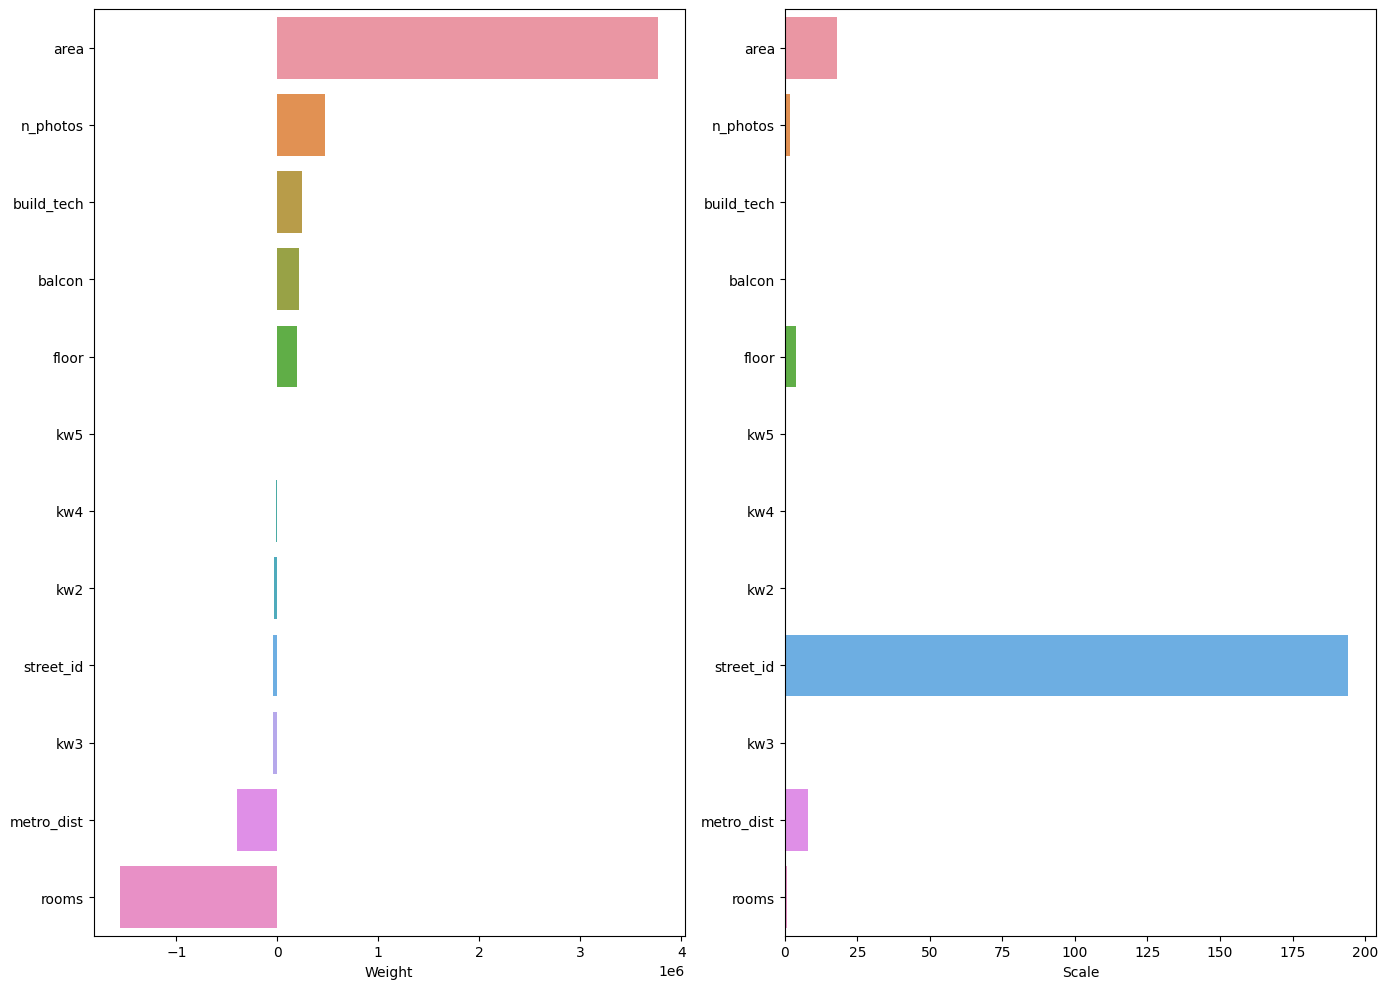

In [144]:
show_weights(numeric_features, model.coef_, X_train[numeric_features].std())

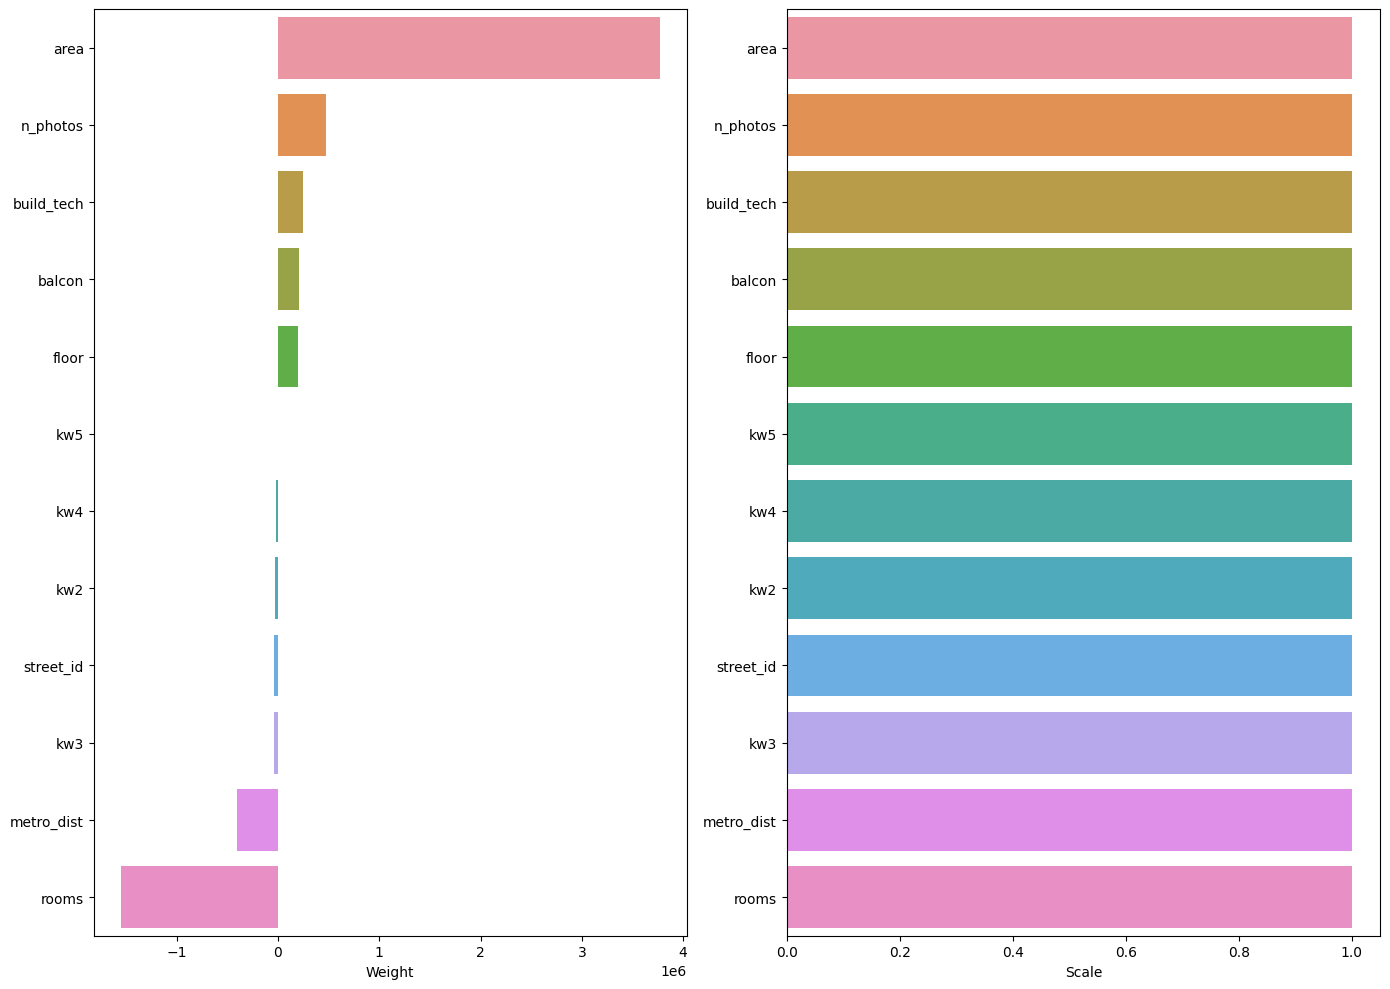

In [145]:
scales = pd.Series(data=X_train_scaled.std(axis=0), index=numeric_features)
show_weights(numeric_features, model.coef_, scales)

In [146]:
correlations

area          0.662661
rooms         0.377233
build_tech    0.369538
balcon        0.292242
floor         0.201177
n_photos      0.189277
kw10          0.082532
id            0.057665
kw11          0.045092
kw13          0.032336
kw12          0.031372
kw1           0.015946
kw7           0.012987
kw6           0.012217
kw8           0.001841
kw9           0.000004
kw5          -0.015622
street_id    -0.023578
kw4          -0.025064
kw3          -0.052641
kw2          -0.065215
metro_dist   -0.092270
dtype: float64

In [147]:
best_params = {
        'objective': 'reg:squarederror', 
        'n_estimators': 1500, 
        'seed': 42, 
        'learning_rate': 0.3, 
        'booster': 'gbtree', 
        'max_depth': 4
        }

In [148]:
params = {
        'objective': 'reg:squarederror', 
        'n_estimators': 1500, 
        'seed': 42, 
        'learning_rate': 0.3, 
        'booster': 'gbtree', 
        'max_depth': 4
        }

In [149]:
import xgboost as xgb

xgb_r = xgb.XGBRegressor(**best_params)

xgb_r.fit(X_train[numeric_features], y_train)
y_pred = xgb_r.predict(X_val[numeric_features])

mean_absolute_error(y_val, y_pred)

840365.133409847

In [150]:
X_test = test_df.copy()

In [151]:
X_test['build_tech'] = X_test['build_tech'].fillna(0)

In [152]:
numeric_data = X_test.select_dtypes([np.number])

numeric_data_mean = numeric_data.mean()

In [153]:
X_test['metro_dist'] = X_test['metro_dist'].fillna(numeric_data_mean['metro_dist'])

In [154]:
ans = xgb_r.predict(X_test[numeric_features])

In [155]:
form = X_test.copy()

In [156]:
form["price"] = ans

In [157]:
form[["id", "price"]].to_csv("predictions.csv", index=False)